In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip -d /content/training_set

Archive:  /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set.zip
  inflating: /content/training_set/S001_128.mat  
  inflating: /content/training_set/S001_128_ann.mat  
  inflating: /content/training_set/S001_128_rpk.mat  
  inflating: /content/training_set/S002_128.mat  
  inflating: /content/training_set/S002_128_ann.mat  
 extracting: /content/training_set/S002_128_rpk.mat  
  inflating: /content/training_set/S003_128.mat  
  inflating: /content/training_set/S003_128_ann.mat  
  inflating: /content/training_set/S003_128_rpk.mat  
  inflating: /content/training_set/S004_128.mat  
  inflating: /content/training_set/S004_128_ann.mat  
 extracting: /content/training_set/S004_128_rpk.mat  
  inflating: /content/training_set/S005_128.mat  
  inflating: /content/training_set/S005_128_ann.mat  
  inflating: /content/training_set/S005_128_rpk.mat  
  inflating: /content/training_set/S006_128.mat  
  inflating: /content/training_set/S006_128_ann.mat  
  inflating: /co

In [4]:
input_dir = "/content/training_set"

In [5]:
import os

# list the data present in the dataset
os.listdir(input_dir)

['S027_128_rpk.mat',
 'S031_128.mat',
 'S107_250_ann.mat',
 'S050_128_ann.mat',
 'S115_250.mat',
 'S046_128_ann.mat',
 'S098_250_rpk.mat',
 'S060_128_ann.mat',
 'S056_128.mat',
 'S009_128_ann.mat',
 'S108_250_rpk.mat',
 'S006_128_ann.mat',
 'S017_128_ann.mat',
 'S098_250_ann.mat',
 'S100_250_ann.mat',
 'S093_250.mat',
 'S054_128_ann.mat',
 'S079_250.mat',
 'S101_250_rpk.mat',
 'S052_128_rpk.mat',
 'S033_128.mat',
 'S106_250_ann.mat',
 'S048_128_rpk.mat',
 'S025_128.mat',
 'S063_128_ann.mat',
 'S114_250_ann.mat',
 'S020_128.mat',
 'S043_128_rpk.mat',
 'S110_250.mat',
 'S024_128.mat',
 'S087_250.mat',
 'S105_250_rpk.mat',
 'S109_250.mat',
 'S115_250_rpk.mat',
 'S055_128_rpk.mat',
 'S049_128_ann.mat',
 'S096_250.mat',
 'S054_128.mat',
 'S112_250.mat',
 'S012_128.mat',
 'S009_128_rpk.mat',
 'S113_250_ann.mat',
 'S061_128.mat',
 'S111_250_rpk.mat',
 'S085_250_rpk.mat',
 'S081_250.mat',
 'S013_128_ann.mat',
 'S094_250.mat',
 'S100_250.mat',
 'S052_128.mat',
 'S088_250.mat',
 'S109_250_ann.ma

Each data sample present:

*   sample.mat : 2-lead ECG signal of a patient of lenght n
*   sample_ann.mat : contains the annotations for each R peak

*   sample_rpk.mat : contains the R peak locations of the signal





# Data loading

In [6]:
# environment setup
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import math

In [7]:
# Utility function to load data

def load_data(ecg_file):
  ecg = loadmat(ecg_file)
  rpk_file = ecg_file.replace('.mat', '_rpk.mat')
  rpk = loadmat(rpk_file)
  ann_file = ecg_file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)
  return ecg, rpk, ann

In [8]:
# Get the ecg file for each sample and create a list of all ecgs
ecg_files = []

for f in os.listdir(input_dir):
  g = os.path.join(input_dir, f)
  if ('ann' not in g) and ('rpk' not in g):
    ecg_files.append(g)
num_files = len(ecg_files)

# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames = list()
ecgs = list()
rpks = list()
anns = list()

for i in range(num_files):
  ecg, rpk, ann = load_data(ecg_files[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, num_files),
        end=""
    )
  ecgs.append(ecg)
  rpks.append(rpk)
  anns.append(ann)
  filenames.append(ecg_files[i])


#ecg = np.asarray(loadmat(g)['ecg'], dtype=np.float64)
#rpk = np.asarray(loadmat(input_dir + "/S083_250_rpk.mat")['rpeaks'], dtype=np.float64)
#ann = np.asarray(loadmat(input_dir + "/S083_250_ann.mat")['labels'])

Loading file: 105/105

# Plot label distribution

In [9]:
classes_name = ['N', 'S', 'V']

In [10]:
# list which contains all labels of each beat
all_labels = []

for sample in anns:
  for beat in sample['labels']:
    all_labels.append(beat)

len(all_labels)

# create a counts of each labels
values, counts = np.unique(all_labels, return_counts=True)
values, counts

(array(['N', 'S', 'V'], dtype='<U1'), array([226932,   9609,   7795]))

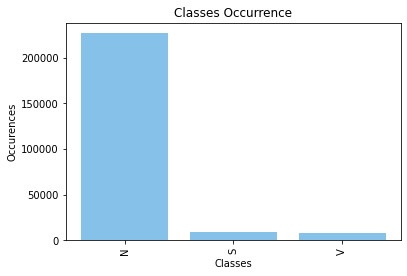

In [11]:
# Plot labels distribution (of all beats of all patients)
plt.bar(x=classes_name,height=counts, facecolor ='#85c1e9')
plt.title("Classes Occurrence", color = "black")
plt.tick_params(axis="both", colors = "black")
plt.xlabel("Classes", color = "black")
plt.ylabel("Occurences", color = "black")
plt.xticks(rotation=90)
plt.yticks
plt.show()

In [12]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [13]:
import neurokit2 as nk

In [14]:
# Utility: given the filename of a signal it returns the sampling frequency
def ecg_freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

In [111]:
# Exploration over some intervals of various single-beat signal

# lists that will contain PR and QR intervals
PR_N = list()
PR_S = list()
PR_V = list()
P_N = list()
P_S = list()
P_V = list()

QR_N = list()
QR_S = list()
QR_V = list()

# interval lists filling loop
for i in range(len(ecgs)):
  # extract a sample ecg
  ecg_sample = np.asarray(ecgs[i]['ecg'], dtype=np.float64)
  sampling = ecg_freq(filenames[i])
  ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
  #Extract peaks from traning set and their labels
  sample_labels = anns[i]['labels']
  sample_rpeaks = rpks[i]['rpeaks']

  # clean ecg_sample
  ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2')

  
  #_,rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=sampling)
  # Building the dictionary with the rpeaks as the function of Neurokit wants
  rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling}
  _, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=sampling, method="dwt")
 
  #create waves_peak in time domain in order to plot the value in the time domain
  waves_peak_td = dict()

  #init the dictionary
  for k in waves_peak.keys():
    waves_peak_td[k] = list()

  for k in waves_peak.keys():
    for i in range(len(waves_peak[k])):
      if(math.isnan(waves_peak[k][i]) == False): #if is not nan, I divide the value for the frequency
        waves_peak_td[k].append(waves_peak[k][i] / sampling)
      else:
        waves_peak_td[k].append(waves_peak[k][i])  

  # add to the correct interval list the invterval of each beat of the current ecg sample
  

  print(len(waves_peak['ECG_P_Peaks']))
  print(len(waves_peak['ECG_R_Onsets']))
  print(len(sample_labels))
  print(len(sample_rpeaks))

  for beat_index in range(len(sample_labels)):
    if sample_labels[beat_index] == 'N':
      try:
        P_N.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        P_N.append(math.nan)
      try:
        PR_N.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid index; Adding nan")
        PR_N.append(math.nan)
      try:  
        QR_N.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid index; Adding nan")
        QR_N.append(math.nan)
    elif sample_labels[beat_index] == 'S':
      try:
        P_S.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        P_S.append(math.nan)  
      try:
        PR_S.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid index; Adding nan")
        PR_S.append(math.nan)
      try:  
        QR_S.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid index; Adding nan")
        QR_S.append(math.nan)
    else:
      try:
        P_V.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        P_V.append(math.nan)  
      try:
        PR_V.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid index; Adding nan")
        PR_V.append(math.nan)
      try: 
        QR_V.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid index; Adding nan")
        QR_V.append(math.nan)  

2174
2174
2174
2174
2587
2587
2587
2587
2559
2559
2559
2559
2318
2318
2318
2318
2565
2565
2565
2565
2843
2843
2843
2843
2179
2179
2179
2179
2666
2666
2666
2666
2431
2431
2431
2431
1820
1820
1820
1820


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4050
4050
4050
4050


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1857
1857
1857
1857
2359
2359
2359
2359
2052
2052
2052
2052
2213
2213
2213
2213


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2263
2263
2263
2263
1903
1903
1903
1903
2767
2767
2767
2767


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2425
2425
2425
2425
1938
1938
1938
1938
1796
1796
1796
1796
2298
2298
2298
2298


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2851
2851
2851
2851


KeyboardInterrupt: ignored

In [112]:
print(len(PR_N))
print(len(PR_V))
print(len(PR_S))

51485
1824
1605


In [113]:
#Flatten the structure of the array
PR_N = [item for sublist in PR_N for item in sublist]
PR_V = [item for sublist in PR_V for item in sublist]
PR_S = [item for sublist in PR_S for item in sublist]

In [114]:
#Flatten the structure of the array
QR_N = [item for sublist in QR_N for item in sublist]
QR_V = [item for sublist in QR_V for item in sublist]
QR_S = [item for sublist in QR_S for item in sublist]

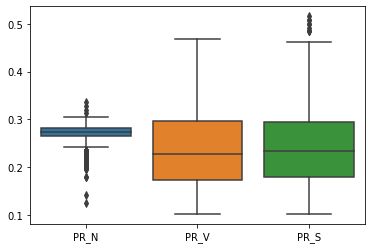

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'PR_N': PR_N[0:len(PR_S)], 'PR_V': PR_V[0:len(PR_S)], 'PR_S': PR_S })
sns.boxplot(data=df)


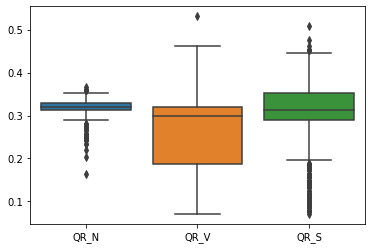

In [116]:
df1 = pd.DataFrame({'QR_N': QR_N[0:len(QR_S)], 'QR_V': QR_V[0:len(QR_S)], 'QR_S': QR_S})
sns.boxplot(data = df1)

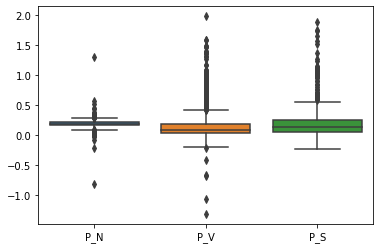

In [117]:
df2 = pd.DataFrame({'P_N': P_N[0:len(P_S)], 'P_V': P_V[0:len(P_S)], 'P_S': P_S})
sns.boxplot(data = df2)